import libraries

In [1]:
import pandas as pd
import os

Current working local directory


In [2]:
dir=os.getcwd()
print(dir)

d:\ALL\All_analysis_projects\4th\fake_news


Back to folder


In [3]:
back=os.path.dirname(dir)
print(back)

d:\ALL\All_analysis_projects\4th


Dataset folder


In [4]:
file1="dataset\Fake.csv"
file2="dataset\True.csv"
path1=os.path.join(back,file1)
path2=os.path.join(back,file2)
print(path1)
print(path2)

d:\ALL\All_analysis_projects\4th\dataset\Fake.csv
d:\ALL\All_analysis_projects\4th\dataset\True.csv


Read the file


In [5]:
dataset1=pd.read_csv(path1)
print(dataset1.head(2))

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  


In [6]:
dataset2=pd.read_csv(path2)
print(dataset2.head(2))

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   


In [7]:
print(dataset1.columns)
print(dataset2.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


create a new colum Label=0 (Fake) and label=1(True)


In [8]:
dataset1["label"]=0
dataset2["label"]=1
print(dataset1.columns)
print(dataset2.columns)

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')


Null values checking


In [9]:
print(dataset1.isnull().sum())
print(dataset2.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64
title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [10]:
print(dataset1.shape)
print(dataset2.shape)

(23481, 5)
(21417, 5)


Equal values


In [11]:
df1=dataset1.iloc[:21417].copy()
df2=dataset2.copy()
print(df1.shape)
print(df2.shape)

(21417, 5)
(21417, 5)


Import NLTK to cleaning texts


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.data.path.append("D:\ALL\All_analysis_projects\3rd\nltk_data")
stop_words=set(stopwords.words("english"))
lem=WordNetLemmatizer()

In [13]:
def clean_text(text):
    text=text.lower()
    text=re.sub(r"[^a-z\s]","",text)
    words=text.split()
    clean_words=[]
    for word in words:
        if word not in stop_words:
            lemma=lem.lemmatize(word)
            clean_words.append(lemma)
    return " ".join(clean_words)        

Apply clean text in new column


In [14]:

df1["clean_text"] = (df1["title"] + " " + df1["text"]).apply(clean_text)
df2["clean_text"] = (df2["title"] + " " + df2["text"]).apply(clean_text)

print(df1["clean_text"][:5])
print(df2["clean_text"][:5])

0    donald trump sends embarrassing new year eve m...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obamas name coded website ...
4    pope francis called donald trump christmas spe...
Name: clean_text, dtype: object
0    u budget fight loom republican flip fiscal scr...
1    u military accept transgender recruit monday p...
2    senior u republican senator let mr mueller job...
3    fbi russia probe helped australian diplomat ti...
4    trump want postal service charge much amazon s...
Name: clean_text, dtype: object


Slicing Title and label


In [15]:
x1=df1["clean_text"]
y1=df1["label"]
x2=df2["clean_text"]
y2=df2["label"]

Splitting


In [16]:
from sklearn.model_selection import train_test_split 
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.25,random_state=50)
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.25,random_state=50)

In [17]:
print(x_train1.shape)
print(x_train2.shape)
print(y_train1.shape)
print(y_train2.shape)

(16062,)
(16062,)
(16062,)
(16062,)


In [18]:
print(x_test1.shape)
print(x_test2.shape)
print(y_test1.shape)
print(y_test2.shape)

(5355,)
(5355,)
(5355,)
(5355,)


Training Features


In [19]:
x_train=pd.concat([x_train1,x_train2],ignore_index=True)
print(x_train.shape)

(32124,)


Training Target


In [20]:
y_train=pd.concat([y_train1,y_train2],ignore_index=True)
print(y_train.shape)

(32124,)


Testing features


In [21]:
x_test=pd.concat([x_test1,x_test2],ignore_index=True)
print(x_test.shape)

(10710,)


Testing Target


In [22]:
y_test=pd.concat([y_test1,y_test2],ignore_index=True)
print(y_test.shape)

(10710,)


Importing Tokenizer and pad_sequences for preprocessing the texts


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Tokenize the trainnig texts


In [24]:
max_words=10000
max_len=200
train_tokenizer=Tokenizer(num_words=max_words,oov_token="<OOV>")
train_tokenizer.fit_on_texts(x_train)
print(train_tokenizer.word_index)

{'<OOV>': 1, 'trump': 2, 'said': 3, 'u': 4, 'state': 5, 'would': 6, 'president': 7, 'people': 8, 'republican': 9, 'one': 10, 'year': 11, 'new': 12, 'reuters': 13, 'house': 14, 'also': 15, 'donald': 16, 'say': 17, 'clinton': 18, 'government': 19, 'obama': 20, 'time': 21, 'country': 22, 'could': 23, 'white': 24, 'told': 25, 'election': 26, 'party': 27, 'united': 28, 'campaign': 29, 'american': 30, 'like': 31, 'official': 32, 'last': 33, 'right': 34, 'two': 35, 'first': 36, 'group': 37, 'news': 38, 'make': 39, 'law': 40, 'former': 41, 'video': 42, 'hillary': 43, 'get': 44, 'vote': 45, 'washington': 46, 'court': 47, 'day': 48, 'even': 49, 'week': 50, 'want': 51, 'security': 52, 'democrat': 53, 'may': 54, 'national': 55, 'leader': 56, 'many': 57, 'bill': 58, 'woman': 59, 'million': 60, 'made': 61, 'image': 62, 'percent': 63, 'police': 64, 'know': 65, 'take': 66, 'going': 67, 'administration': 68, 'tax': 69, 'since': 70, 'support': 71, 'political': 72, 'back': 73, 'think': 74, 'senate': 75, 

In [25]:
import pickle
with open("tokenizer.pkl",'wb') as f:
    pickle.dump(train_tokenizer,f)

Token to Sequences


In [26]:
x_train_seq=train_tokenizer.texts_to_sequences(x_train)
x_test_seq=train_tokenizer.texts_to_sequences(x_test)
print(x_train_seq[0])
print(x_test_seq[0])

[1227, 1223, 3041, 253, 8520, 407, 87, 2, 42]
[2806, 1, 44, 4357, 185, 1152, 1224, 1545, 3451, 27, 9130, 2349, 196, 42, 1152, 1224, 1545, 3451, 183, 5355, 3068, 3059, 221, 148, 602, 2806, 1, 261, 9386, 2624, 804, 2081, 4002, 67, 27, 9130, 2349, 196, 235, 20, 1906, 1201, 111, 243, 3845, 2120, 474, 1, 912, 1152, 490, 27, 669, 115, 26, 1, 607, 5576, 2089, 1002, 18, 6827, 1, 564, 73, 2806, 940, 53, 208, 360, 691, 33, 356, 6, 31, 819, 111, 3451, 5564, 491, 1, 3, 225, 288, 224, 1, 35, 286, 73, 3556, 3451, 2244, 1022, 1410, 288, 215, 1, 1, 161, 2300, 242, 70, 4885, 1, 1469, 493, 73, 3451, 804, 1116, 1902, 6349, 647, 242, 685, 124, 70, 65, 183, 199, 637, 3002, 457, 43, 18, 921, 2806, 65, 5837, 1, 320, 3451, 9738, 139, 3451, 1152, 550, 1754, 203, 153, 2226, 2806, 1, 1, 34, 3451, 572, 550, 900, 73, 115, 26, 396, 1533, 1866, 130, 4751, 53, 1, 368, 185, 855, 2549, 1, 4449, 73, 27, 9130, 2349, 196, 235, 20, 1906, 1201, 561, 1]


Padding the sequence texts


In [27]:
train_padding=pad_sequences(x_train_seq,maxlen=max_len,padding="post")
test_padding=pad_sequences(x_test_seq,maxlen=max_len,padding="post")
print(train_padding[0])
print(test_padding[0])

[1227 1223 3041  253 8520  407   87    2   42    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [28]:
print(train_padding.shape)

(32124, 200)


In [29]:
import numpy as np
print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int64), array([5355, 5355], dtype=int64))


LSTM [Lost-Short Term Memory] and layers


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

Model


In [31]:
model=Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(32),
    Dense(64,activation="relu"),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [32]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [33]:
early=EarlyStopping(monitor="val_loss",restore_best_weights=True,patience=5)

Model training


In [34]:
train=model.fit(train_padding,y_train,epochs=30,batch_size=32,validation_split=0.2,callbacks=[early])

Epoch 1/30
804/804 [==============================] - 1352s 2s/step - loss: 0.2830 - accuracy: 0.8678 - val_loss: 0.2528 - val_accuracy: 0.9507
Epoch 2/30
804/804 [==============================] - 1182s 1s/step - loss: 0.1409 - accuracy: 0.9552 - val_loss: 0.1698 - val_accuracy: 0.9701
Epoch 3/30
804/804 [==============================] - 1055s 1s/step - loss: 0.0955 - accuracy: 0.9694 - val_loss: 0.0641 - val_accuracy: 0.9883
Epoch 4/30
804/804 [==============================] - 843s 1s/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.0843 - val_accuracy: 0.9765
Epoch 5/30
804/804 [==============================] - 830s 1s/step - loss: 0.0287 - accuracy: 0.9916 - val_loss: 0.1190 - val_accuracy: 0.9679
Epoch 6/30
804/804 [==============================] - 821s 1s/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.0997 - val_accuracy: 0.9767
Epoch 7/30
804/804 [==============================] - 830s 1s/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0823 - val_accuracy: 0.9

model save


In [35]:
model.save("fake_news.h5")

Training and validation accuracy


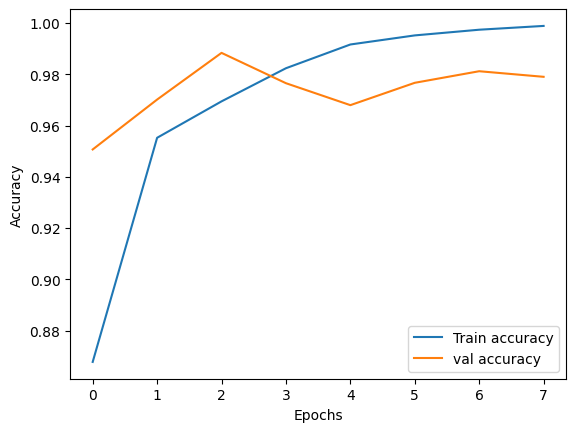

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train.history["accuracy"],label="Train accuracy")
plt.plot(train.history["val_accuracy"],label="val accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Accuracy


In [37]:
loss,accuracy=model.evaluate(test_padding,y_test)
print(f"Test Acuracy: {accuracy}")

335/335 [==============================] - 166s 396ms/step - loss: 0.0954 - accuracy: 0.9735
Test Acuracy: 0.9734827280044556


prediction


In [35]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_padding)
y_pred = (y_pred > 0.5).astype("int")

print("Sklearn Accuracy:", accuracy_score(y_test, y_pred))


335/335 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step
Sklearn Accuracy: 0.5
